# GCC118 - Programação Matemática
## Prof. Mayron César de O. Moreira
### Programação Linear: Modelagem Matemática

- *Universidade Federal de Lavras*  
- *Departamento de Ciência da Computação*  

## Problema de Corte

Uma empresa tem que produzir ao menos 500 peças de um produto. Para a fabricação de uma peça, precisa-se de três lâminas de metal do tamanho A (0,3m $\times$ 0,7m) e duas lâminas de metal do tamanho B (0,4m $\times$ 0,6m). Para este fim, a empresa tem que cortar as lâminas de lâminas básicas do tipo I (1m $\times$ 1m) ou do tipo II (0,6m $\times$ 1,5m). Temos as seguintes possibilidades de cortes na Tabela abaixo:

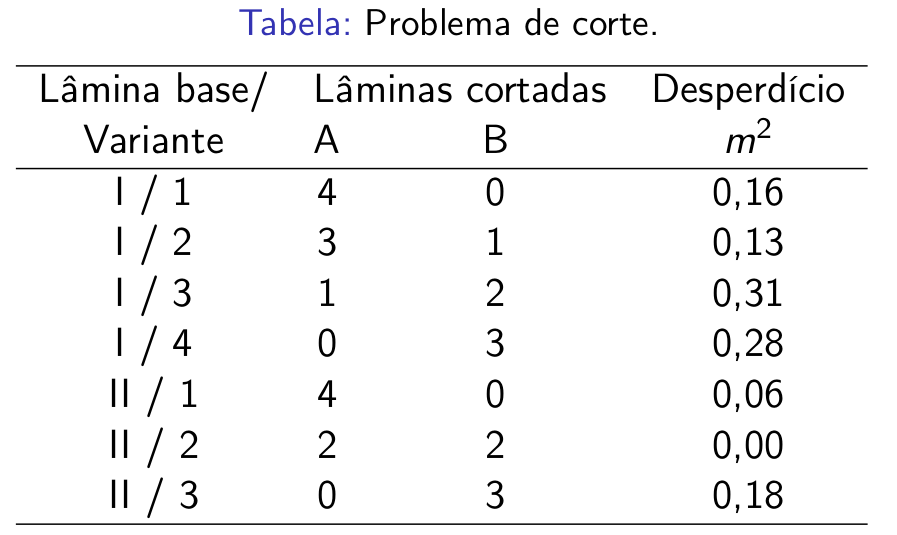

In [1]:
from IPython.display import Image
Image(filename='./images/Tabela_Corte.png', width=500, height=500)

**Objetivo:** Formule um modelo linear que produz a quantidade de peças desejadas (ou seja, ao menos 500) minimizando o desperdício. 

### Parâmetros

- Quantidade de lâminas do tipo A e do tipo B cortadas com o padrão I/1, I/2, ..., II/3;
- Desperdício advindo de cada padrão;
- Padrão I/1 (1), padrão I/2 (2), ..., padrão II/3 (7).

Neste exemplo, vamos modelar o problema de forma mais simples, tal que os parâmetros fiquem diretamente inseridos na formulação.

### Cria o modelo

In [2]:
from gurobipy import * # Biblioteca que resolverá o modelo formulado

# Cria o modelo
m = Model("Problema de corte")

Academic license - for non-commercial use only


### Variáveis

- $x_{1} \ge 0, x_2 \ge 0, ..., x_7 \ge 0$: quantidade de vezes que cada padrão de corte (de 1 a 7) foi utilizado.

In [3]:
# Declaração das variáveis x_1,...,x_7
x1 = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=GRB.INFINITY, name="x1")
x2 = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=GRB.INFINITY, name="x2")
x3 = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=GRB.INFINITY, name="x3")
x4 = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=GRB.INFINITY, name="x4")
x5 = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=GRB.INFINITY, name="x5")
x6 = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=GRB.INFINITY, name="x6")
x7 = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=GRB.INFINITY, name="x7")

### Função objetivo

*Minimiza o total de desperdício*
\begin{equation}
\mbox{min } f(x_1,...,x_7) = 0.16x_1 + 0.13x_2 + 0.31x_3 + 0.28x_4 + 0.06x_5 + 0.00x_6 + 0.18x_7
\end{equation}

In [4]:
# Implementação da função objetivo
m.setObjective(0.16*x1 + 0.13*x2 + 0.31*x3 + 0.28*x4 + 0.06*x5 + 0.00*x6 + 0.18*x7, GRB.MINIMIZE)

### Restrições

Devemos garantir que pelo menos 500 peças sejam produzidas. Como cada peça exige 3 lâminas do tipo A e 2 lâminas do tipo B, pelo menos 1500 ($3\cdot 500$) lâminas A e 1000 lâminas B ($2 \cdot 500$) serão produzidas.

\begin{equation}
4x_1 + 3x_2 + x_3 + 0x_4 + 4x_5 + 2x_6 + 0x_7 \ge 1500 \\
0x_1 + x_2 + 2x_3 + 3x_4 + 0x_5 + 2x_6 + 3x_7 \ge 1000
\end{equation}

In [5]:
m.addConstr(4*x1 + 3*x2 + x3 + 0*x4 + 4*x5 + 2*x6 + 0*x7 >= 1500, "Restricao_A")
m.addConstr(0*x1 + x2 + 2*x3 + 3*x4 + 0*x5 + 2*x6 + 3*x7 >= 1000, "Restricao_B")

<gurobi.Constr *Awaiting Model Update*>

### Resolve o modelo e imprime solução

In [6]:
m.optimize()

if m.status == GRB.Status.OPTIMAL:
    m.printAttr('X')
    
else:
    print("Modelo finalizado com status %d" % m.status)

Optimize a model with 2 rows, 7 columns and 10 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [6e-02, 3e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 2e+03]
Presolve removed 2 rows and 7 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds
Optimal objective  0.000000000e+00

    Variable            X 
-------------------------
          x6          750 
